# **Importing** **Libraries**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
#for heatmap and stuff
import seaborn as sns
#for graphs
import matplotlib.pyplot as plt
%matplotlib inline

# **Importing datset**

In [ ]:
from google.colab import files


# Upload the file
uploaded = files.upload()

# Read the file into a DataFrame
data = pd.read_csv("diabetes.csv")

# Print the first few rows of the DataFrame
print(data)


Saving diabetes.csv to diabetes (1).csv
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0

In [ ]:
#For missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#To check each column don't have any null values
#It is done while we are doing real time data mining
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#To have various decriptive data about the dataset like mean,sd,min,max etc.
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Correlation** **Matrix**

Text(0.5, 1.0, 'Correlation Heatmap')

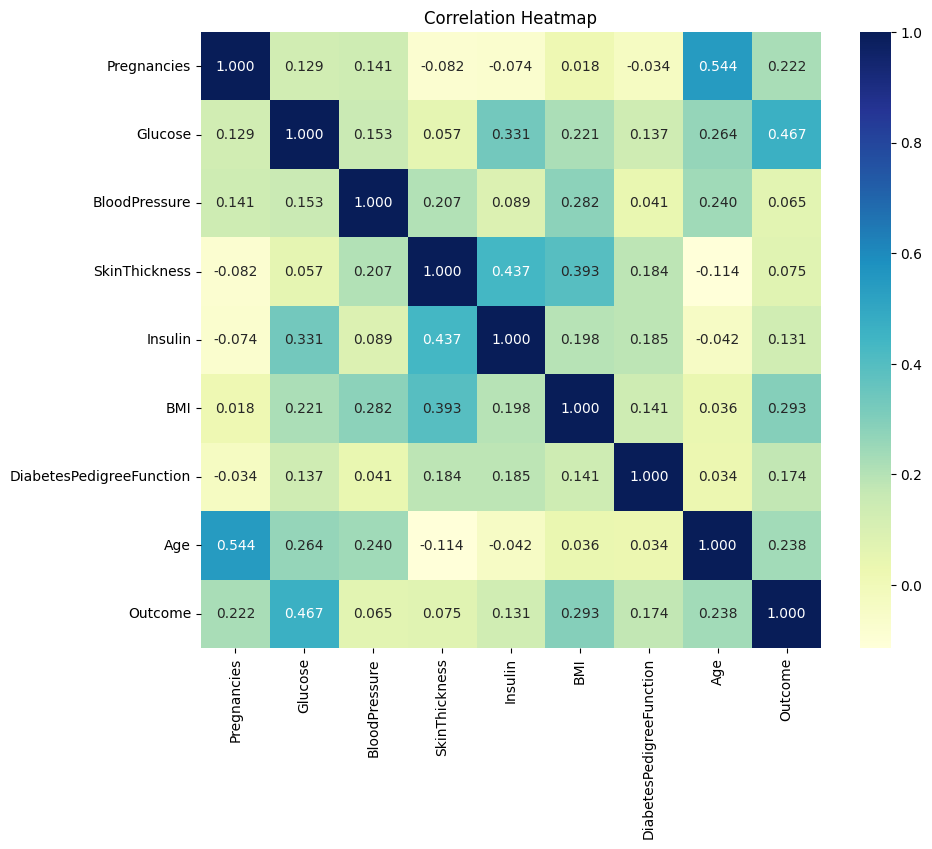

In [ ]:
#Correlation plot of independent variables
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(),annot = True ,fmt =".3f",cmap="YlGnBu")
#Tells us how closse a column is close or related to another column
plt.title("Correlation Heatmap")

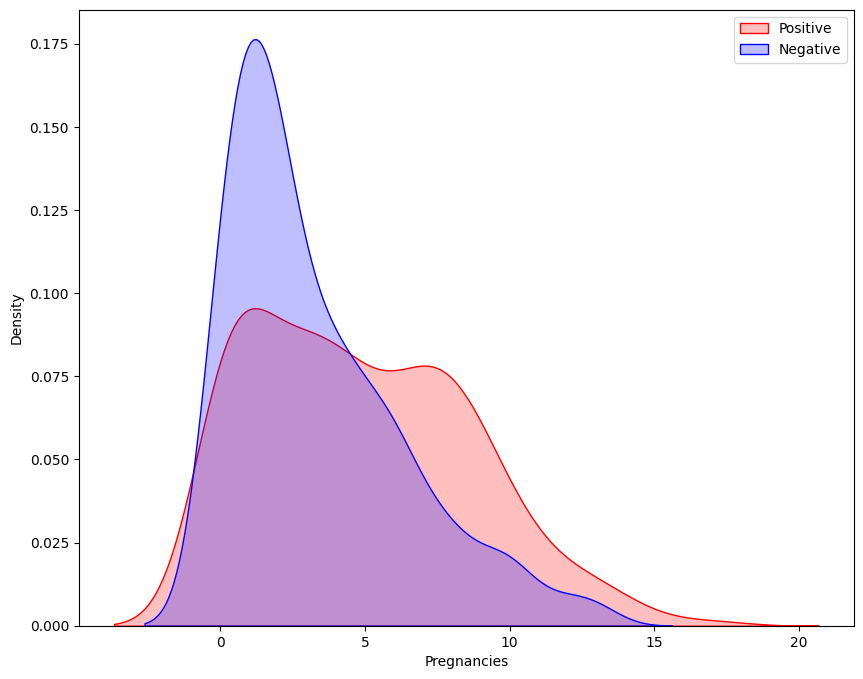

In [ ]:
#Exploring preganancies and target variables
plt.figure(figsize =(10,8))
#plotting Density function graph of the preganancies and target variable
kde=sns.kdeplot(data["Pregnancies"][data["Outcome"]==1],color ="Red", fill =True)
kde=sns.kdeplot(data["Pregnancies"][data["Outcome"]==0],color ="Blue", fill =True)
kde.set_xlabel("Pregnancies")
#help us to check the babies born having parents with diabetes
kde.set_ylabel("Density")
kde.legend(["Positive","Negative"])

<Axes: xlabel='Outcome', ylabel='Glucose'>

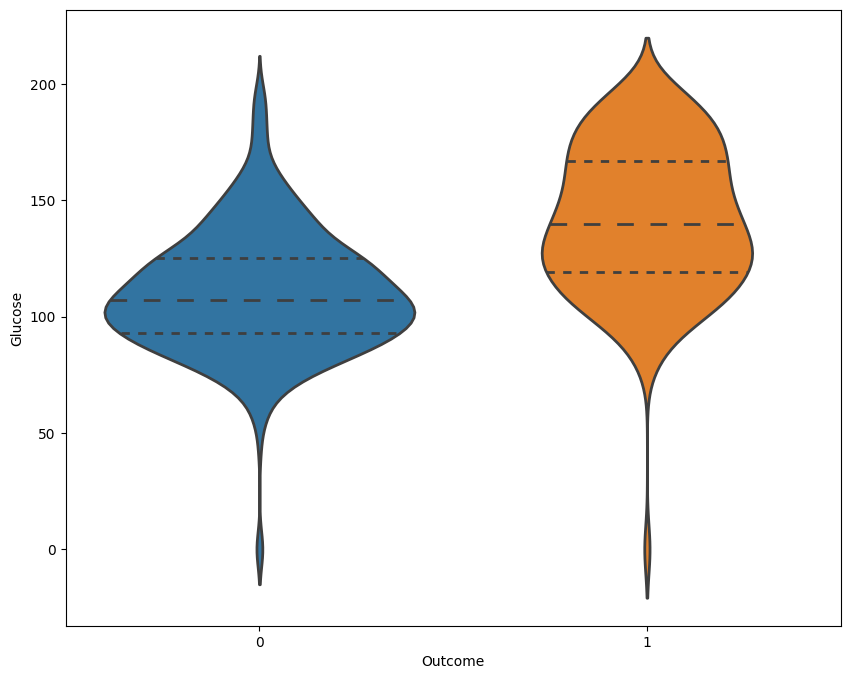

In [ ]:
#Exploring glucose and Target variables
plt.figure(figsize =(10,8))
sns.violinplot(data=data,x="Outcome",y="Glucose",split=True,linewidth=2,inner="quart")
#It tells us how the outcome is likely to happen  or nor with increase in Glucose level

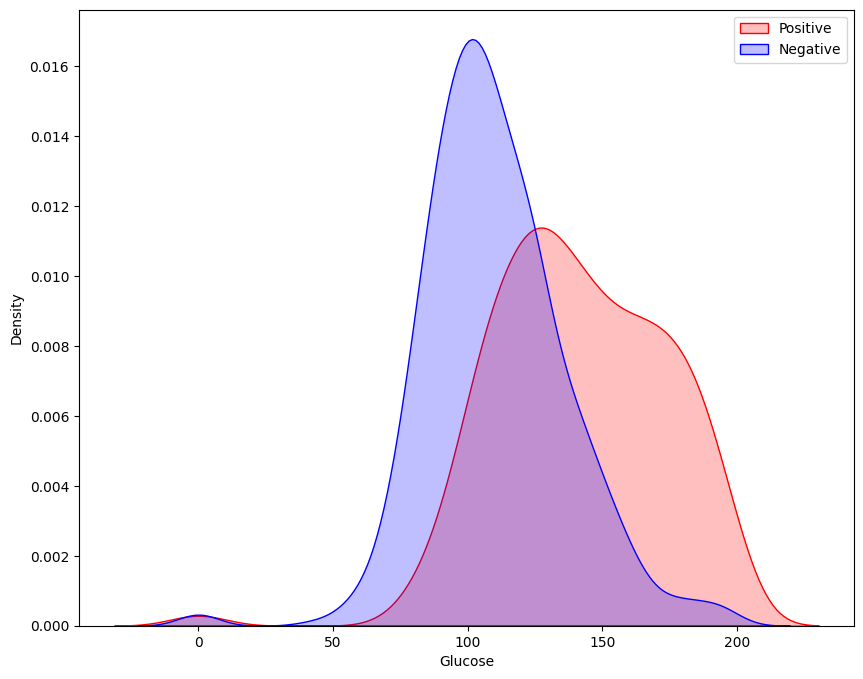

In [ ]:
#Exploring Glucose and target variables
plt.figure(figsize =(10,8))
#plotting Density function graph of the preganancies and target variable
kde=sns.kdeplot(data["Glucose"][data["Outcome"]==1],color ="Red", fill =True)
kde=sns.kdeplot(data["Glucose"][data["Outcome"]==0],color ="Blue", fill =True)
kde.set_xlabel("Glucose")
#It is just same as the violin plot done earlier
kde.set_ylabel("Density")
kde.legend(["Positive","Negative"])

#**Replacing 0 values with mean/median of the respective label**

In [ ]:
#Glucose
data["Glucose"] = data["Glucose"].replace(0,data["Glucose"].median())
#Blood Pressure
data["BloodPressure"] = data["BloodPressure"].replace(0,data["BloodPressure"].median())
#BMI
data["BMI"] = data["BMI"].replace(0,data["BMI"].mean())
#SkinThickness
data["SkinThickness"] = data["SkinThickness"].replace(0,data["SkinThickness"].mean())
#Insulin
data["Insulin"] = data["Insulin"].replace(0,data["Insulin"].mean())

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35.000,80.254,33.6,0.127,47,1
1,0,84,82,31.000,125.000,38.2,0.233,23,0
2,0,145,72,20.935,80.254,44.2,0.630,31,1
3,0,135,68,42.000,250.000,42.3,0.365,24,1
4,1,139,62,41.000,480.000,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24.000,55.000,29.7,0.370,33,0
1996,8,179,72,42.000,130.000,32.7,0.719,36,1
1997,6,85,78,20.935,80.254,31.2,0.382,42,0
1998,0,129,110,46.000,130.000,67.1,0.319,26,1


# **Splitting dataset into Train and Test set**

In [ ]:
#Splitting the dependent and independent variables
x = data.drop(["Outcome"],axis=1)
y = data["Outcome"]
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6      148             72      35.000000   79.799479  33.6   
1              1       85             66      29.000000   79.799479  26.6   
2              8      183             64      20.536458   79.799479  23.3   
3              1       89             66      23.000000   94.000000  28.1   
4              0      137             40      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10      101             76      48.000000  180.000000  32.9   
764            2      122             70      27.000000   79.799479  36.8   
765            5      121             72      23.000000  112.000000  26.2   
766            1      126             60      20.536458   79.799479  30.1   
767            1       93             70      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [ ]:
# Splitting the data set into training and testing data set
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [ ]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,20.536458,79.799479,24.0,1.022,34
223,7,142,60,33.000000,190.000000,28.8,0.687,61
393,4,116,72,12.000000,87.000000,22.1,0.463,37
766,1,126,60,20.536458,79.799479,30.1,0.349,47
570,3,78,70,20.536458,79.799479,32.5,0.270,39
...,...,...,...,...,...,...,...,...
71,5,139,64,35.000000,140.000000,28.6,0.411,26
106,1,96,122,20.536458,79.799479,22.4,0.207,27
270,10,101,86,37.000000,79.799479,45.6,1.136,38
435,0,141,72,20.536458,79.799479,42.4,0.205,29


In [ ]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33.000000,190.000000,34.0,0.430,43
324,2,112,75,32.000000,79.799479,35.7,0.148,21
624,2,108,64,20.536458,79.799479,30.8,0.158,21
690,8,107,80,20.536458,79.799479,24.6,0.856,34
473,7,136,90,20.536458,79.799479,29.9,0.210,50
...,...,...,...,...,...,...,...,...
311,0,106,70,37.000000,148.000000,39.4,0.605,22
429,1,95,82,25.000000,180.000000,35.0,0.233,43
182,1,117,74,20.000000,23.000000,27.7,0.299,21
586,8,143,66,20.536458,79.799479,34.9,0.129,41


In [ ]:
#Making the model
#First implementing K nearest Neighbours(KNN)
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
#We will be taking the k value from 1 to 10
training_accuracy=[]
test_accuracy=[]
for n_neighbors in range(1,11):
  knn=KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(x_train,y_train)
  #Checking accuracy score
  training_accuracy.append(knn.score(x_train,y_train))
  test_accuracy.append(knn.score(x_test,y_test))


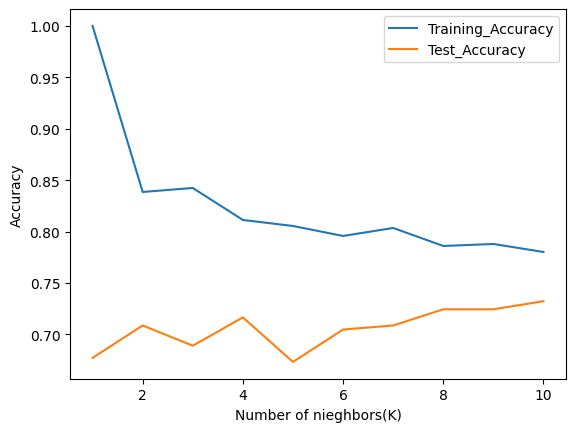

In [ ]:
plt.plot(range(1,11), training_accuracy , label ="Training_Accuracy")
plt.plot(range(1,11), test_accuracy , label ="Test_Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of nieghbors(K)")
plt.legend()

In [ ]:
knn=KNeighborsClassifier(4)
knn.fit(x_train,y_train)
print("Training Accuracy ->",round(knn.score(x_train,y_train),2))
print("Test Accuracy->",round(knn.score(x_test,y_test),2))

Training Accuracy -> 0.81
Test Accuracy-> 0.72


In [ ]:
from sklearn.metrics import accuracy_score
predictions=knn.predict(x_test)
accuracy=accuracy_score(predictions,y_test)
print(round(accuracy,2))

0.72


In [ ]:
#Using Decision Tree Classifier Model
#A decision tree is a tree like data structure to make calssification and predictions using regression tasks
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0 , max_depth =6)
dt.fit(x_train,y_train)
print("Training Accuracy ->",round(dt.score(x_train,y_train),2))
print("Test Accuracy->",round(dt.score(x_test,y_test),2))

Training Accuracy -> 0.86
Test Accuracy-> 0.74


In [ ]:
#MLP a neural network model
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(x_train,y_train)
print("Training Accuracy ->",round(mlp.score(x_train,y_train),2))
print("Test Accuracy->",round(mlp.score(x_test,y_test),2))

Training Accuracy -> 0.75
Test Accuracy-> 0.68


In [ ]:
#Preprocing Step
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)


In [ ]:
#MLP a neural network model with scaled data
from sklearn.neural_network import MLPClassifier
mlps = MLPClassifier(random_state=42)
mlps.fit(x_train_scaled,y_train)
print("Training Accuracy ->",round(mlps.score(x_train_scaled,y_train),2))
print("Test Accuracy->",round(mlps.score(x_test_scaled,y_test),2))

Training Accuracy -> 0.83
Test Accuracy-> 0.74


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# **Logistic** **Regression**

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
#Making Predictions
predictions = model .predict(x_test)
accuracy = accuracy_score(predictions , y_test)
print(accuracy)

0.7559055118110236


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
